# Welcome to `arcospy`!

`arcospy` is the python sister software module to the original R arcos package maintained by the [Washington Post](https://github.com/wpinvestigative/arcos). Here we will demonstrate how to download some arcos data and how to make the data spatial. We also hint at some advanced usage!

# Understanding the available commands. 

`arcospy` shares the same functionality as `arcos`. All functions have the same name across R and Python. The functions are grouped into the following types:

- Summarized: retrieve aggregated data at either the county or state level
- Raw: returns raw data at either the county or state level (NOTE: these functions will return large amounts of data) 
- Supplemental: retrieve supplemental information on the reporting pharmacies that contribute to ARCOS 

# API keys

In this demo notebook we use the generic key 'WaPo'. However, more API keys are available [here](https://github.com/wpinvestigative/arcos-api/blob/master/keys/keys.txt). As per the R `arcos` warning regarding keys:

>"...We reserve the right to blacklist these and invite users to sign up for their own individual keys in the future if the need arises. ... If you publish anything based on this data set, please credit The Washington Post, link to the original source, and send us an email when you’ve hit publish. We want to learn what you discover and will attempt to link to your work as part of cataloguing the impact of this project." (Full statement regarding keys [here.](https://github.com/wpinvestigative/arcos)


# Installing and loading `arcospy`

`arcospy` is `pip` installable. Run the following command to install `arcospy` on your machine!

In [1]:
!pip install arcospy

You should consider upgrading via the 'c:\users\jeffe\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Let's load the module...

In [2]:
import arcospy

To take a quick glance at the available commands we bring up the help menu...

In [4]:
# Print the available functions
help(arcospy)

Help on package arcospy:

NAME
    arcospy

PACKAGE CONTENTS
    arcospy

FUNCTIONS
    buyer_addresses(county='', state='', key='')
    
    buyer_details(county='', state='', key='')
    
    combined_buyer_annual(county='', state='', key='')
    
    combined_buyer_monthly(county='', state='', year='', key='')
    
    county_population(county='', state='', key='')
    
    county_raw(county='', state='', key='')
    
    county_raw_fips(fips='', key='')
    
    not_pharmacies(key='')
    
    pharm_cbsa(geoid='', county='', state='', key='')
    
    pharm_counties(county='', state='', key='')
    
    pharm_latlon(county='', state='', key='')
    
    pharm_tracts(county='', state='', key='')
    
    pharmacy_raw(buyer_dea_no='', key='')
    
    raw_data(key='')
    
    reporter_addresses(county='', state='', key='')
    
    state_population(state='', key='')
    
    summarized_county_annual(county='', state='', key='')
    
    summarized_county_monthly(county='', state='',

# Demonstrating a summarized command

Here we will retrieve annual summarized pill totals for Hennepin County, Minnesota. 

In [5]:
arcospy.summarized_county_annual(county = 'Hennepin', state = 'MN', key = 'WaPo')

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,HENNEPIN,MN,2006,47616,21765611,27053
1,HENNEPIN,MN,2007,51075,24114225,27053
2,HENNEPIN,MN,2008,55566,25827807,27053
3,HENNEPIN,MN,2009,61914,27615051,27053
4,HENNEPIN,MN,2010,68443,29672003,27053
5,HENNEPIN,MN,2011,71006,30737624,27053
6,HENNEPIN,MN,2012,74167,30931080,27053
7,HENNEPIN,MN,2013,80126,30279420,27053
8,HENNEPIN,MN,2014,75960,30495020,27053


# Demonstrating a raw command

We can run the raw-equivalent of the above command to get the data at the reporter level for Lake County, MN.

Note the output size of the dataframe - it is already moderately large (4061 rows × 42 columns) and this is for only one small county! The output dataframe includes much more information but takes longer to process and may be bulky depending on your hardware.

In [7]:
arcospy.county_raw(county = 'Lake', state = 'MN', key = 'WaPo')

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,RD0352637,DISTRIBUTOR,DAKOTA DRUG INC.,null,1101 LUND BLVD.,P O BOX 877,ANOKA,MN,55303,ANOKA,...,500,13935,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.",Dakota Drug,5.0
1,RD0352637,DISTRIBUTOR,DAKOTA DRUG INC.,null,1101 LUND BLVD.,P O BOX 877,ANOKA,MN,55303,ANOKA,...,300,13938,HYDROCODONE BITARTRATE AND ACETA 7.5,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","Allergan, Inc.",Dakota Drug,7.5
2,RD0352637,DISTRIBUTOR,DAKOTA DRUG INC.,null,1101 LUND BLVD.,P O BOX 877,ANOKA,MN,55303,ANOKA,...,300,14355,HYDROCODONE BIT./ACETAMINOPHEN TABS.,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Amneal Pharmaceuticals LLC,"Amneal Pharmaceuticals, Inc.",Dakota Drug,10.0
3,RD0352637,DISTRIBUTOR,DAKOTA DRUG INC.,null,1101 LUND BLVD.,P O BOX 877,ANOKA,MN,55303,ANOKA,...,100,14356,HYDROCODONE/IBUPROFEN 7.5MG/200MG TA,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Amneal Pharmaceuticals LLC,"Amneal Pharmaceuticals, Inc.",Dakota Drug,7.5
4,RE0161733,DISTRIBUTOR,AMERISOURCEBERGEN DRUG CORP,null,6810 SHADY OAK RD,null,EDEN PRAIRIE,MN,55344,HENNEPIN,...,100,12912,HYDROCODONE BIT/ACETA 5MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,Mallinckrodt,AmerisourceBergen Drug,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,RW0243725,DISTRIBUTOR,CARDINAL HEALTH,null,2901 ENLOE ST,null,HUDSON,WI,54016,SAINT CROIX,...,100,1007007102,HYDROCODONE BIT/ACETA 10MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,Mallinckrodt,Cardinal Health,10.0
4057,RW0243725,DISTRIBUTOR,CARDINAL HEALTH,null,2901 ENLOE ST,null,HUDSON,WI,54016,SAINT CROIX,...,100,1008002328,OXYCONTIN - 40MG OXYCODONE.HCL CONTR,OXYCODONE HYDROCHLORIDE,TAB,1.5,Purdue Pharma LP,Purdue Pharma LP,Cardinal Health,40.0
4058,RW0243725,DISTRIBUTOR,CARDINAL HEALTH,null,2901 ENLOE ST,null,HUDSON,WI,54016,SAINT CROIX,...,100,1010012181,HYDROCODONE BIT/ACETA 10MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,Mallinckrodt,Cardinal Health,10.0
4059,RW0243725,DISTRIBUTOR,CARDINAL HEALTH,null,2901 ENLOE ST,null,HUDSON,WI,54016,SAINT CROIX,...,500,1012000341,HYDROCODONE BIT/ACETA 7.5MG/500MG US,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,Mallinckrodt,Cardinal Health,7.5


# Demonstrating a supplemental command

What if you wanted to analyze the data at the pharmacy level as a point process? We can get the latitude and longitude of the pharmacies below:

In [8]:
arcospy.pharm_latlon(county = 'Hennepin', state = 'MN', key = 'WaPo')

,BUYER_DEA_NO,BUYER_STATE,BUYER_COUNTY,lat,lon
0,AS4935093,MN,HENNEPIN,44.9681,-93.2088
1,BF9051385,MN,HENNEPIN,44.9341,-93.2124
2,BF9047932,MN,HENNEPIN,44.9801,-93.2141
3,BF9049506,MN,HENNEPIN,44.9801,-93.2141
4,BF9049518,MN,HENNEPIN,44.9801,-93.2141
...,...,...,...,...,...
314,FS3550630,MN,HENNEPIN,44.9355,-93.6430
315,AN3646746,MN,HENNEPIN,45.0055,-93.6488
316,AT6590524,MN,HENNEPIN,44.9382,-93.6648
317,FW2426977,MN,HENNEPIN,44.9382,-93.6648


Due the massive number of reporting pharmacies, it is possible that some pharmacies may fall outside state borders by accident (as raised on the Github issues page [here](https://github.com/wpinvestigative/arcos/issues/3)). Depending on your purposes, it may be useful to clip (or at least create an indicator variable for) the pharmacies that fall outside the state. 

# Making the data spatial

One of the most interesting possibilites of this data is its readiness for spatial analysis. However, the WP ARCOS API does not provide any shapefiles so we need to source those from somewhere. There are a few options for this:

- Manually download shapefiles and import them using geopandas
- Gather shapefiles via cenpy or some other python package
- Directly import shapefiles from a designated URL

Here we use the python `cenpy` module for a quick demonstration, but users interested in conducting year-specific analyses, especially for the years 2006-2009, might try sourcing shapefiles from the U.S. Census Bureau or the tidycensus package in R. 

Here we will make use of the official U.S. Census 2010 county-level shapefiles for Minnesota, available [here](https://www2.census.gov/geo/pvs/tiger2010st/27_Minnesota/27/tl_2010_27_county10.zip). Please note these files were downloaded, unzipped, and then manually imported (i.e. the first option above).

In [11]:
# Download summarized data for Minnesota
mn_summarized = arcospy.summarized_county_annual(state = 'MN', key = 'WaPo')

mn_summarized.head()

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,AITKIN,MN,2006,1227,357900,27001
1,AITKIN,MN,2007,1456,394400,27001
2,AITKIN,MN,2008,1481,457700,27001
3,AITKIN,MN,2009,1787,530300,27001
4,AITKIN,MN,2010,2158,580320,27001


In [12]:
mn_summarized.dtypes

BUYER_COUNTY    object
BUYER_STATE     object
year             int64
count            int64
DOSAGE_UNIT      int64
countyfips      object
dtype: object

For convenience, we restrict the data to 2010.

In [13]:
# Restrict the data to the year of 2010
mn_2010 = mn_summarized[mn_summarized['year']==2010]

mn_2010.head()

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
4,AITKIN,MN,2010,2158,580320,27001
13,ANOKA,MN,2010,21430,9176630,27003
22,BECKER,MN,2010,3093,699080,27005
31,BELTRAMI,MN,2010,3009,763450,27007
40,BENTON,MN,2010,2394,712740,27009


Now we load in the MN 2010 county shapefiles using geopandas.

In [15]:
import geopandas as gpd

In [16]:
mn_shp = gpd.read_file('C:/Users/jeffe/Desktop/example/tl_2010_27_county10.shp')

Let's create a test plot to ensure the file renders.

<AxesSubplot:>

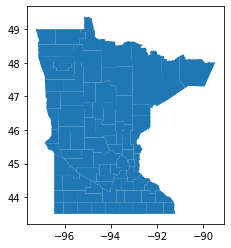

In [17]:
mn_shp.plot()

Let's take a look at the data characteristics to understand what columns we are going to merge on.

In [18]:
mn_shp.head()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,27,061,00659476,27061,Itasca,Itasca County,06,H1,G4020,None,None,None,A,6909367239,674021189,+47.4908429,-093.6131284,"POLYGON ((-93.06349 47.63314, -93.06351 47.632..."
1,27,077,00659483,27077,Lake of the Woods,Lake of the Woods County,06,H1,G4020,None,None,None,A,3361466280,1234895902,+48.7681003,-094.9046335,"POLYGON ((-95.09032 48.80001, -95.09031 48.800..."
2,27,025,00659458,27025,Chisago,Chisago County,06,H1,G4020,378,33460,None,A,1074486739,71347419,+45.5054439,-092.9038486,"POLYGON ((-93.01864 45.36772, -93.01862 45.368..."
3,27,113,00659502,27113,Pennington,Pennington County,06,H1,G4020,None,None,None,A,1596909321,4351512,+48.0692470,-096.0377254,"POLYGON ((-95.72252 48.17299, -95.71376 48.172..."
4,27,085,00659491,27085,McLeod,McLeod County,06,H1,G4020,378,26780,None,A,1272903896,36406906,+44.8216437,-094.2723203,"POLYGON ((-94.49791 44.72654, -94.49792 44.726..."


Looks like GEOID10 is the ticket! We can quickly rename GEOID10 to countyfips to match the column returned by the `arcospy` function.

In [19]:
mn_shp = mn_shp.rename(columns={"GEOID10": "countyfips"})

But are the columns the same dtypes?

In [20]:
mn_shp.dtypes

STATEFP10       object
COUNTYFP10      object
COUNTYNS10      object
countyfips      object
NAME10          object
NAMELSAD10      object
LSAD10          object
CLASSFP10       object
MTFCC10         object
CSAFP10         object
CBSAFP10        object
METDIVFP10      object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

Let's now join the two files on GEOID10. 

In [21]:
mn_2010_spatial = mn_shp.merge(mn_2010, on='countyfips')

Now we can plot the total dosage units per county in 2010 and make some small aesthetic changes. I follow [this StackExchange](https://stackoverflow.com/questions/54236083/geopandas-reduce-legend-size-and-remove-white-space-below-map) post to add a 'normal' sized color ramp.

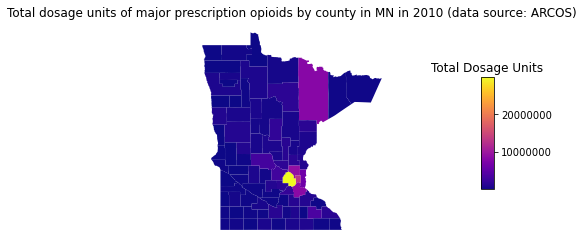

In [22]:
# Load matplotlibes
import matplotlib.pyplot as plt

# Define colors
colormap = "plasma" 

# Draw the base percent population age 0-5 map
ax = mn_2010_spatial.plot(column='DOSAGE_UNIT',
                          cmap = colormap)

ax.set_axis_off()
ax.set_title("Total dosage units of major prescription opioids by county in MN in 2010 (data source: ARCOS)")

fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])   
cbax.set_title('Total Dosage Units')

sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mn_2010_spatial.DOSAGE_UNIT), vmax=max(mn_2010_spatial.DOSAGE_UNIT)))

sm._A = []
fig.colorbar(sm, cax=cbax, format="%d")

plt.show()

Perhaps not the best color choice! Can you do better? Happy mapping!